# MNIST with Keras

The MNIST dataset comprises $70000$ ($60000$ train $+$ $10000$ test) handwritten digits, each of which comes in a square image, divided into a $28 \times 28$ pixel grid. Every pixel can take on $256$ nuances of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,…,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic classification task.

Importing packages

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# set pytorch as a backend for keras
os.environ["KERAS_BACKEND"] = "torch"

# import keras (do it AFTER setting the backend)
import keras

## Step 1: load and process the data

Data reshaped from (60000, 28, 28)  to (60000, 784)
Data type:  <class 'numpy.float32'>
Max and min data value:  1.0 0.0
an example of a data point with label 4


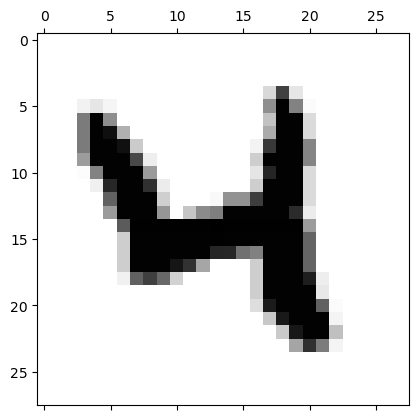

One-hot encoding: labels reshaped from (60000,)  to (60000, 10)


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


n_classes = 10 # from 0 to 9
n_rows, n_cols = 28, 28 # number of pixels 


# reshape data
X_train = x_train.reshape(x_train.shape[0], n_rows*n_cols)
X_test = x_test.reshape(x_test.shape[0], n_rows*n_cols)

print("Data reshaped from", x_train.shape, " to", X_train.shape)


# cast data from integers to single precision floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("Data type: ", type(X_train[0,0]))

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

print("Max and min data value: ", np.max(X_train), np.min(X_train))


# look at an example of data point
print('an example of a data point with label', y_train[20])
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()


# convert class vectors to binary class matrices (one-hot encoding)
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

print("One-hot encoding: labels reshaped from", y_train.shape, " to", Y_train.shape)

## Step 2: define the NN and its architecture

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add imput layer
    inputs = keras.Input(shape=(n_rows*n_cols,))
    # add a dense all-to-all relu layer
    model.add(Dense(400, activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(n_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


## Step 3: Choose the Optimizer and the Cost Function

In [4]:
def compile_model(optimizer=keras.optimizers.Adam()):
    # create the mode
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


## Step 4: train the model

In [5]:
# training parameters
batch_size = 64
epochs = 10

# create the deep neural net
model_DNN=compile_model()
model_DNN.summary()

# train DNN and store training info in history
history=model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8349 - loss: 0.5443 - val_accuracy: 0.9659 - val_loss: 0.1148
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9613 - loss: 0.1355 - val_accuracy: 0.9727 - val_loss: 0.0941
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9741 - loss: 0.0888 - val_accuracy: 0.9766 - val_loss: 0.0762
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9799 - loss: 0.0679 - val_accuracy: 0.9791 - val_loss: 0.0712
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9845 - loss: 0.0510 - val_accuracy: 0.9804 - val_loss: 0.0709
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9870 - loss: 0.0407 - val_accuracy: 0.9796 - val_loss: 0.0787
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9879 - loss: 0.0374 - val_accuracy: 0.9792 - val_loss: 0.0767
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9900 - loss: 0.0328 - val_accuracy: 0.

## Step 5: Evaluate the Model Performance on the Unseen Test Data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 0.1126

Test loss: 0.08926644921302795
Test accuracy: 0.9782999753952026


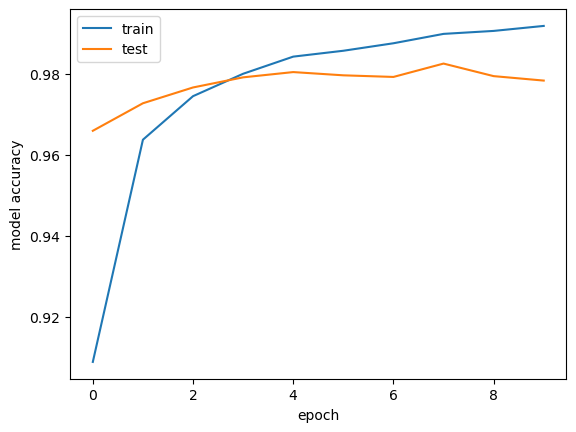

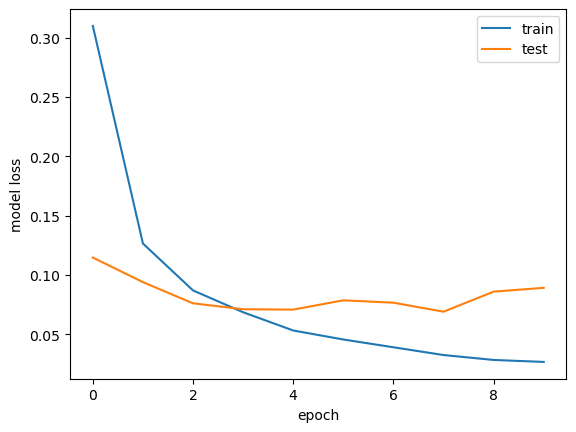

In [6]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Additional Step: Modify the Hyperparameters to Optimize Performance of the Model